In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
df = pd.read_csv("f_all_adult.csv")
#df['target'].value_counts()

income-per-year    120
Name: target, dtype: int64

In [3]:
df1 = pd.read_csv("f_nofs_adult.csv")
#df1['model_type'].unique()

In [4]:
#df1['target'].value_counts()

income-per-year    24
Name: target, dtype: int64

In [5]:
df2 = pd.read_csv("f_sfs_adult.csv")
df2['model_type'].unique()

array(['base_model', 'fair_model_adversarial', 'fair_model', 'lfr_model'],
      dtype=object)

In [6]:
frames = [df, df1, df2]

data = pd.concat(frames)
data['model_type'].unique()

array(['base_model', 'fair_model_adversarial', 'fair_model', 'lfr_model'],
      dtype=object)

In [7]:
data['technique'].unique()

array(['<function maximally_predictive_minimally_demographic at 0x7f7d7f850f70>',
       '<function sequential_feature_selection_backward at 0x7f7d7f850dc0>',
       '<function sequential_feature_selection_forward at 0x7f7d7f8508b0>',
       '<function sufficiency_criteria at 0x7f7d7f851000>',
       '<function xy_greater_xa at 0x7f7d7f850790>',
       '<function no_fselection at 0x7f35ae412170>',
       '<function sequential_fs at 0x7f127ca44ee0>'], dtype=object)

In [8]:
data['fs'] = data['technique'].str.split(' ').apply(pd.Series)[1]

In [9]:
data = data.replace(['maximally_predictive_minimally_demographic','sequential_feature_selection_backward',
    'sequential_feature_selection_forward', 'sufficiency_criteria','xy_greater_xa','no_fselection','sequential_fs'], 
                  ['MPMD','bsfs','fsfs','suff','xy>xa','no_fs','lr_fsfs'])


In [10]:
data['fs'].unique()

array(['MPMD', 'bsfs', 'fsfs', 'suff', 'xy>xa', 'no_fs', 'lr_fsfs'],
      dtype=object)

In [11]:
data['model_type'].unique()


array(['base_model', 'fair_model_adversarial', 'fair_model', 'lfr_model'],
      dtype=object)

In [12]:
df = data.copy()

df = df[df.eta != 30]
df = df[df.eta != 1]
df = df[df.eta != 10]

In [13]:
df['eta'].unique()

array([nan, 20.])

In [14]:
df.columns

Index(['Unnamed: 0', 'data', 'features_cat', 'features_num',
       'protected_attributes', 'p_att_description', 'target', 'etas',
       'feat_dictionary', 'greater', 'k', 'technique', 'model', 'dir_name',
       'model_type', 'disparate_impact', 'statistical_parity_difference',
       'equal_opportunity_difference', 'average_abs_odds_difference',
       'positive_predictive_value', 'negative_predictive_value', 'accuracy',
       'eta', 'fs'],
      dtype='object')

In [15]:
df['target'].value_counts()

income-per-year    112
Name: target, dtype: int64

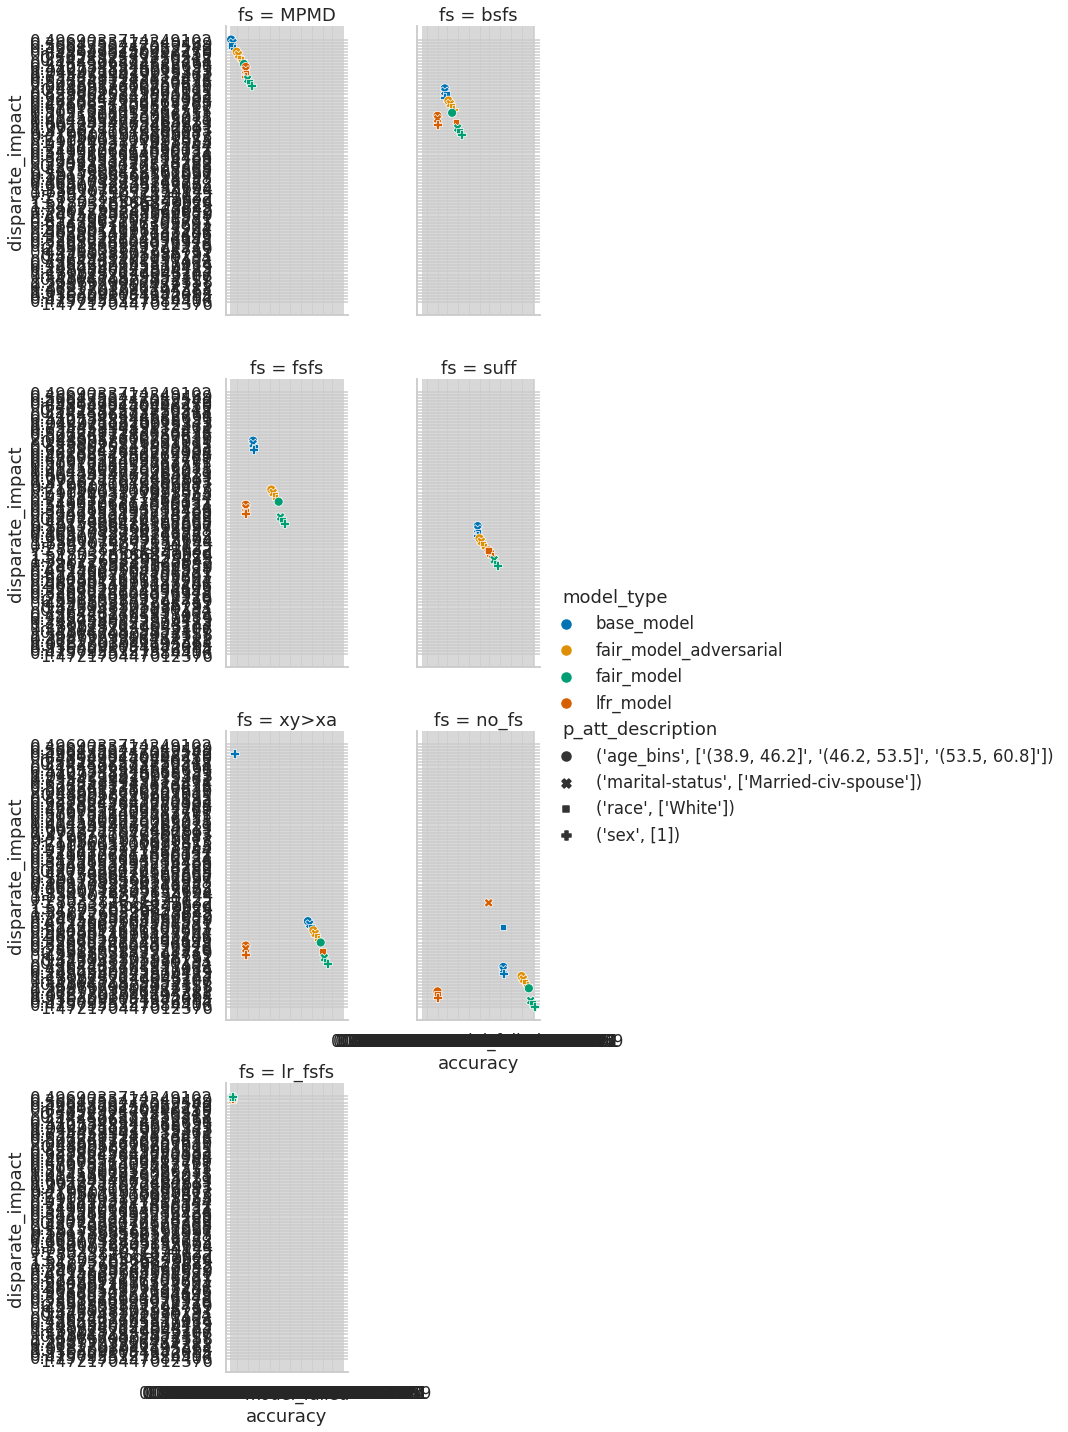

In [17]:
import matplotlib.pyplot as plt
di_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='disparate_impact', hue='model_type', col = 'fs', 
            style = 'p_att_description', col_wrap = 2)
plt.savefig('di_adult_eta_20plot.png')


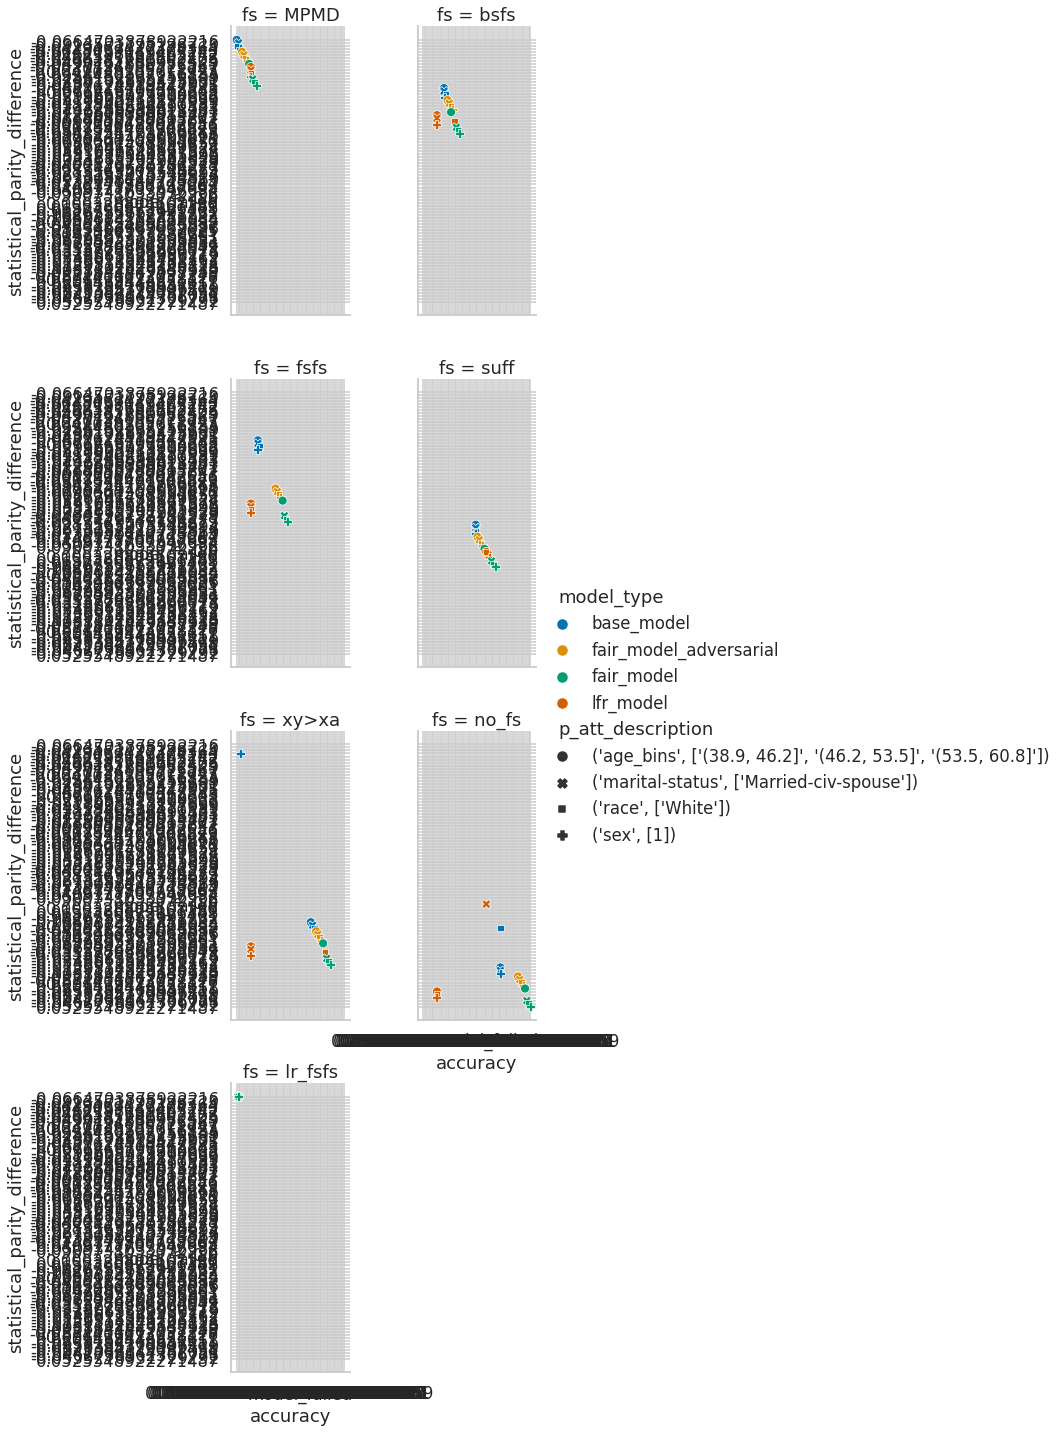

In [19]:
sp_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='statistical_parity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('sp_adult_eta_20plot.png')


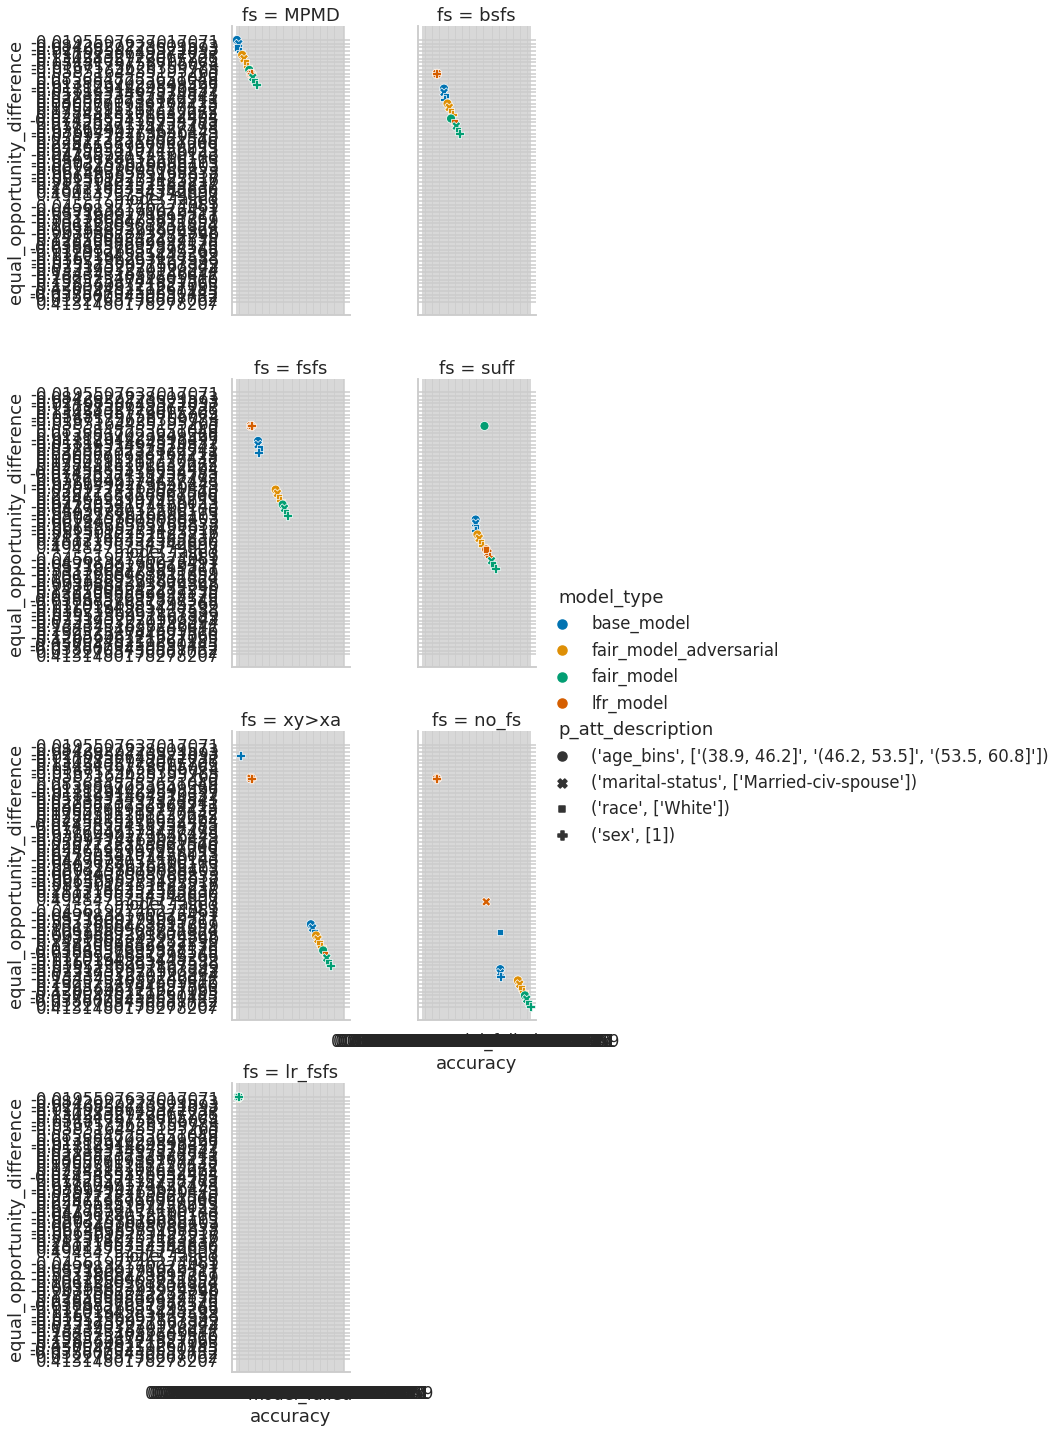

In [20]:
eo_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='equal_opportunity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('eo_adult_eta_20plot.png')

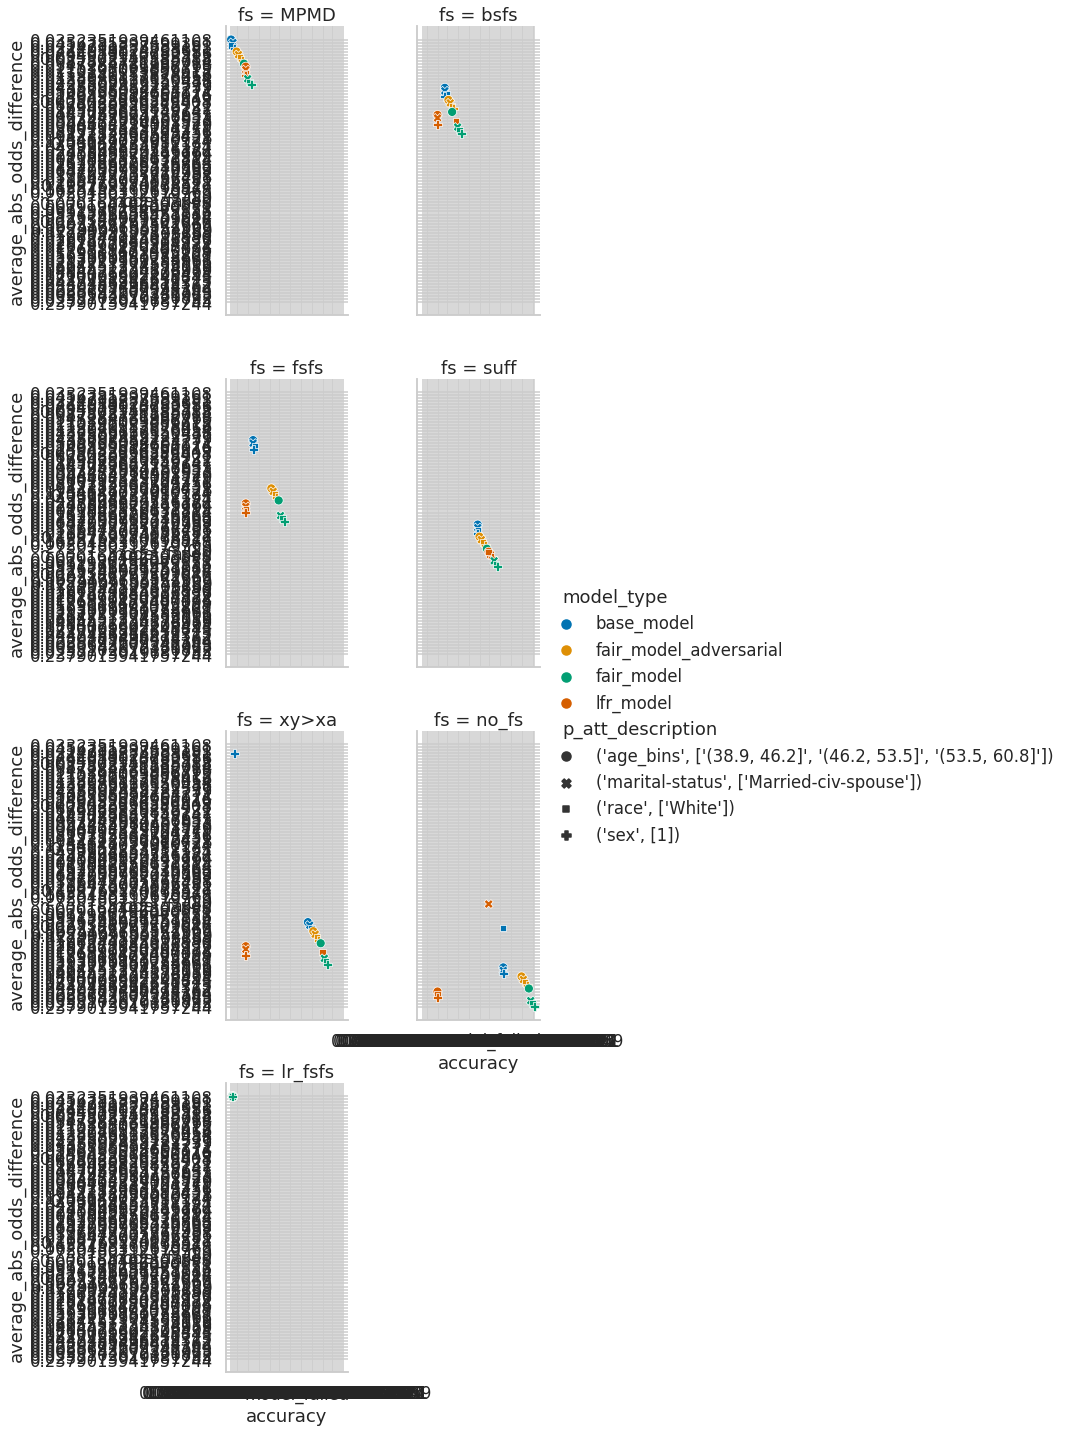

In [21]:
aaod_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='average_abs_odds_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('aaod_adult_eta_20plot.png')

#equal_opportunity_difference','average_abs_odds_difference','positive_predictive_value',
#'negative_predictive_value','accuracy'


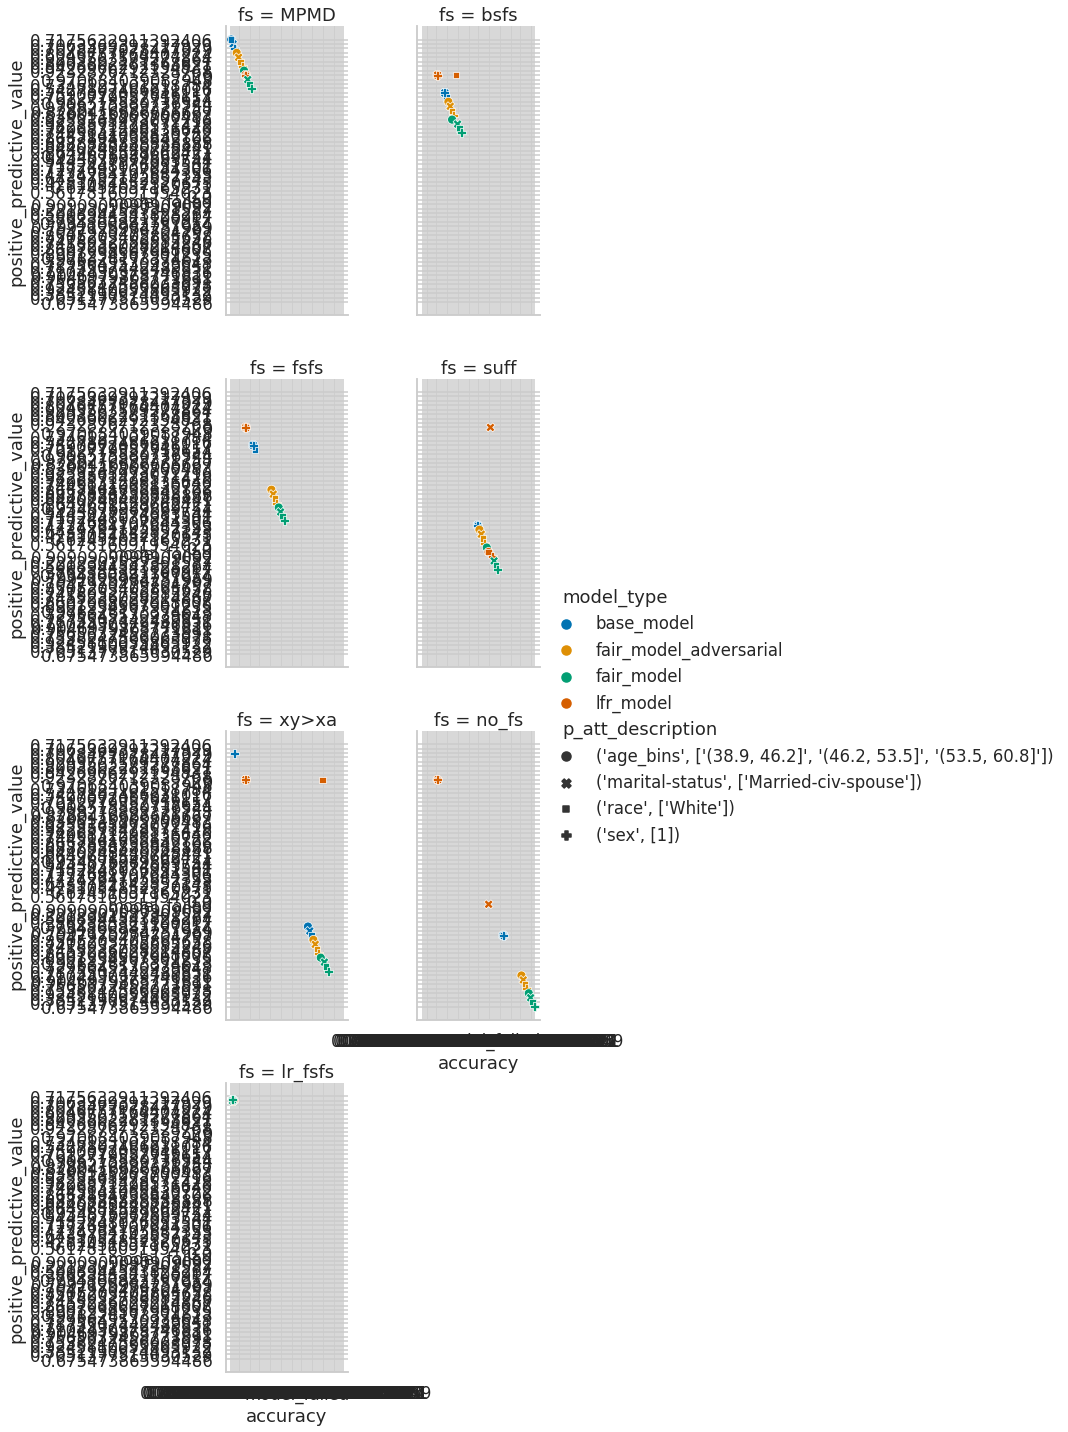

In [22]:
ppv_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='positive_predictive_value', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('ppv_adult_eta_20plot.png')

#equal_opportunity_difference','average_abs_odds_difference','positive_predictive_value',
#'negative_predictive_value','accuracy'

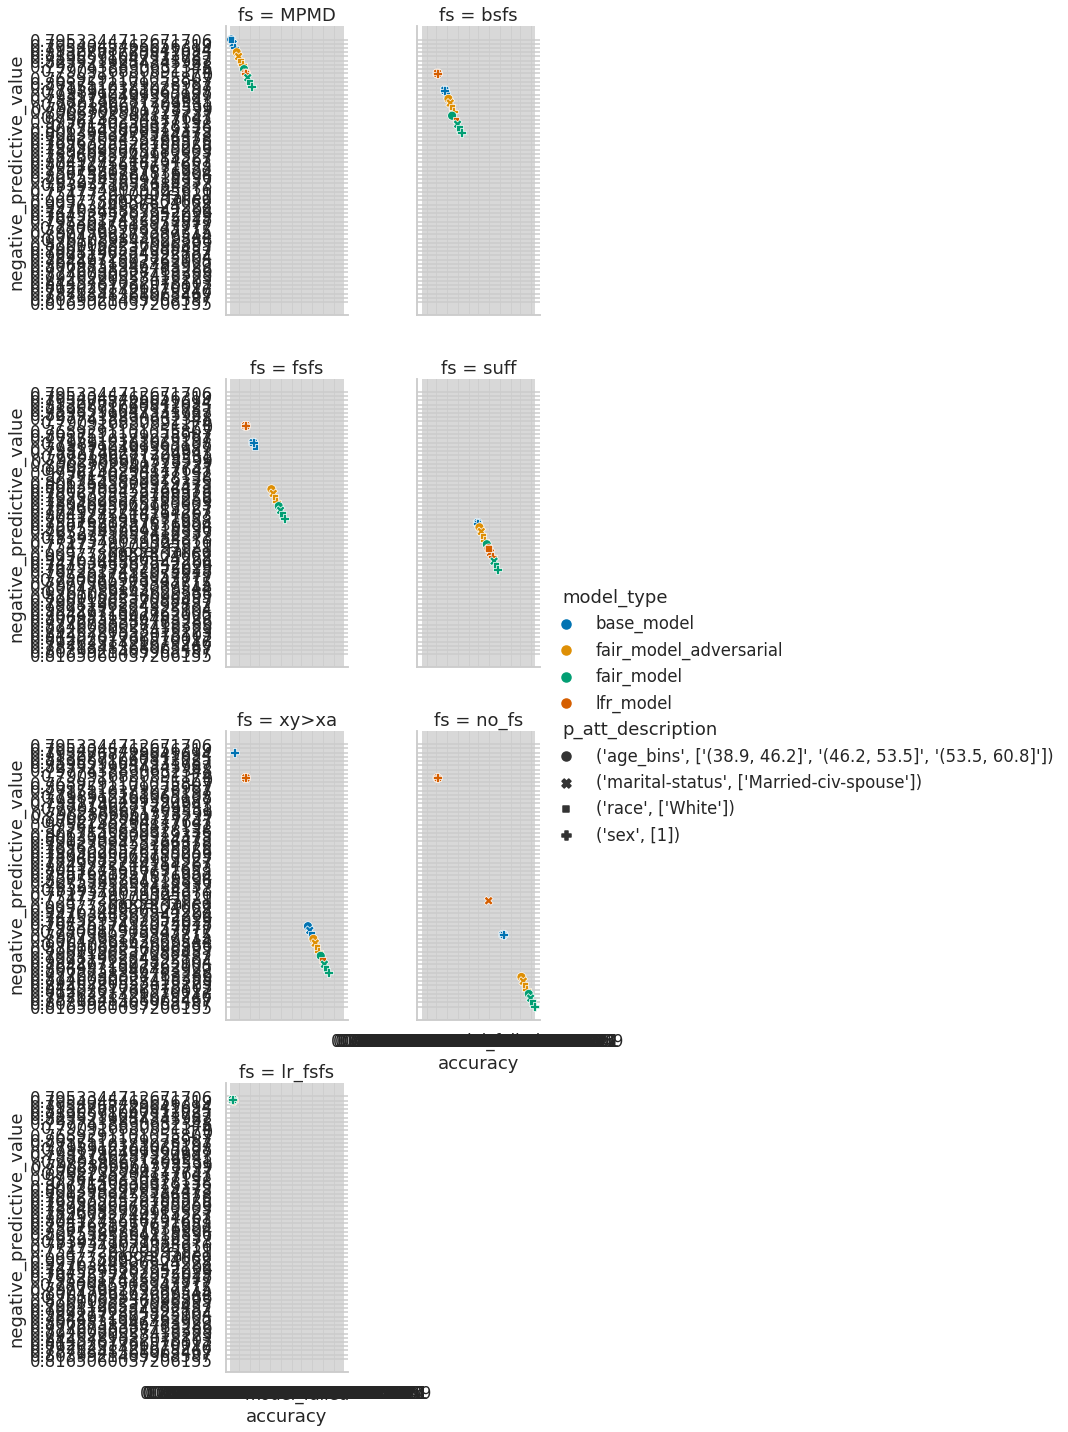

In [23]:
npv_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='negative_predictive_value', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('npv_adult_eta_20plot.png')

#equal_opportunity_difference','average_abs_odds_difference','positive_predictive_value',
#'negative_predictive_value','accuracy'